<a href="https://colab.research.google.com/github/CVerka/Homework/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#import libraries
import nltk
import requests
import imageio
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
from pathlib import Path
from operator import itemgetter
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
#initialize variables
target_url ='http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text
image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-15-ab3bd8b5b98a>:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)


,word,count
0,ham,337
1,lord,211
2,haue,175
3,king,173
4,shall,107
5,hamlet,106
6,come,106
7,thou,105
8,let,104
9,good,99


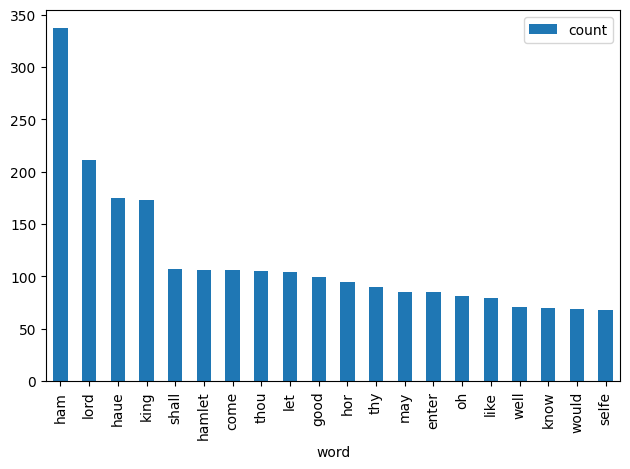

In [14]:
#textblob
blob=TextBlob(data)
#variable to hold items in blob
items = blob.word_counts.items()
#stopwords
stopwords = nltk.corpus.stopwords.words('english')
#cycle through items removing stopwords
items = [item for item in items if item[0] not in stopwords]
#hold sorted items
sorted_items = sorted(items, key=itemgetter(1), reverse=True)
#hold top20 items
top20 = sorted_items[:20]
#dataframe to display top 20
df = pd.DataFrame(top20, columns=['word', 'count'])
df.plot.bar(x='word', y='count')
plt.gcf().tight_layout()
df

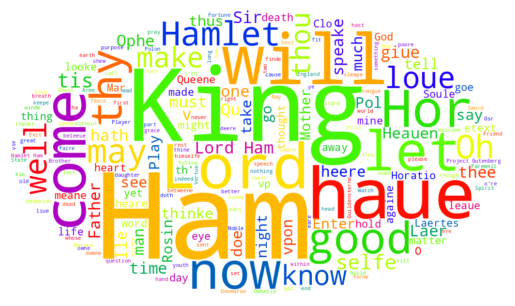

In [18]:
#word cloud
wordcloud = WordCloud(colormap='prism',background_color='white', mask=mask_image).generate(data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()